### Problem

The number of shoes sold by an e-commerce company during the first three months(12 weeks) of the year were: 
23 21 19 24 35 17 18 24 33 27 21 23

Meanwhile, the company dveloped some dynamic price optimiztion algorithms and the sales for the next 12 weeks were:
31 28 19 24 32 27 16 41 23 32 29 33

### Solution

Before we get onto different approaches, let's quickly get a feel for the data.

In [1]:
import numpy as np
import seaborn as sns
sns.set(color_codes=True)


In [2]:
#Load the data
before_opt = np.array([23, 21, 19, 24,35, 17, 18, 24, 33, 27, 21, 23])
after_opt = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
before_opt.mean()

23.75

In [4]:
after_opt.mean()

27.916666666666668

In [5]:
observed_diff = Out[4] - Out[3]

In [6]:
print("Difference between the means is:", observed_diff)

Difference between the means is: 4.166666666666668


On average, the sales after optimization is more than the sales before optimization.  But is the difference legit?  Could it be due to chance?

### Classical Method: 
We could cover this method later on.  This entails doing a t-test

### Hacker's Method:
Let's see if we can provide a hacker's perspective to this problem, similar to what we did in the previous example.

In [12]:
shoe_sales = np.array([np.append(np.zeros(before_opt.shape[0]), np.ones(after_opt.shape[0])), np.append(before_opt, after_opt)], dtype=int)

In [13]:
print("Shape:", shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (2, 24)
Data: 
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1]
 [23 21 19 24 35 17 18 24 33 27 21 23 31 28 19 24 32 27 16 41 23 32 29 33]]


In [17]:
shoe_sales = shoe_sales.T
print("Shape:", shoe_sales.shape)
print("Data:", "\n", shoe_sales)

Shape: (24, 2)
Data: 
 [[ 0 23]
 [ 0 21]
 [ 0 19]
 [ 0 24]
 [ 0 35]
 [ 0 17]
 [ 0 18]
 [ 0 24]
 [ 0 33]
 [ 0 27]
 [ 0 21]
 [ 0 23]
 [ 1 31]
 [ 1 28]
 [ 1 19]
 [ 1 24]
 [ 1 32]
 [ 1 27]
 [ 1 16]
 [ 1 41]
 [ 1 23]
 [ 1 32]
 [ 1 29]
 [ 1 33]]


This is the approach we are going to take
We are going to randomly shuffle the labels.  Then compute the mean between the two groups.  
Find the percentage of times when the difference between the mans computed is greater than what we observed above
If the percentage of times is less than 5%, we would make the call the impovements are real

In [18]:
np.random.shuffle(shoe_sales)
shoe_sales

array([[ 0, 23],
       [ 1, 41],
       [ 1, 29],
       [ 0, 21],
       [ 1, 28],
       [ 0, 23],
       [ 1, 19],
       [ 1, 16],
       [ 0, 35],
       [ 1, 33],
       [ 1, 31],
       [ 1, 27],
       [ 0, 33],
       [ 0, 17],
       [ 0, 21],
       [ 1, 23],
       [ 0, 24],
       [ 0, 19],
       [ 1, 24],
       [ 0, 27],
       [ 1, 32],
       [ 0, 24],
       [ 1, 32],
       [ 0, 18]])

In [19]:
experiment_label = np.random.randint(0, 2, shoe_sales.shape[0])
experiment_label

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1])

In [20]:
experiment_data = np.array([experiment_label, shoe_sales[:,1]])
experiment_data = experiment_data.T
print(experiment_data)

[[ 0 23]
 [ 0 41]
 [ 1 29]
 [ 0 21]
 [ 1 28]
 [ 0 23]
 [ 1 19]
 [ 0 16]
 [ 0 35]
 [ 1 33]
 [ 0 31]
 [ 0 27]
 [ 0 33]
 [ 1 17]
 [ 1 21]
 [ 1 23]
 [ 1 24]
 [ 0 19]
 [ 1 24]
 [ 0 27]
 [ 1 32]
 [ 1 24]
 [ 1 32]
 [ 1 18]]


In [28]:
experiment_diff_mean = experiment_data[experiment_data[:,0]==1].mean() - experiment_data[experiment_data[:,0]==0].mean()

In [29]:
experiment_diff_mean

-0.49300699300699335

## Like the previous example, let's repeat this experiment 100 and then 100,000 times

In [38]:
def shuffle_experiment(number_of_times):
    experiment_diff_mean = np.empty([number_of_times, 1])
    for times in np.arange(number_of_times):
        experiment_label = np.random.randint(0, 2, shoe_sales.shape[0])
        experiment_data = np.array([experiment_label, shoe_sales[:,1]]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:,0]==1].mean() - experiment_data[experiment_data[:,0]==0].mean() 
    return experiment_diff_mean

In [44]:
experiment_diff_mean = shuffle_experiment(100000)

In [45]:
experiment_diff_mean[:10]

array([[ 1.04285714],
       [ 2.15714286],
       [-0.15734266],
       [-0.85664336],
       [ 0.9       ],
       [ 0.27777778],
       [-0.3       ],
       [ 1.43333333],
       [-1.32222222],
       [ 1.84285714]])

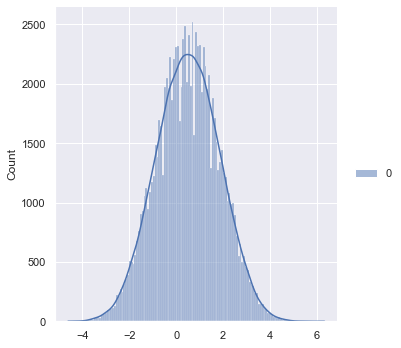

In [46]:
sns.displot(experiment_diff_mean, kde=True)